# Gender Classifer

## 1.  Flowchart

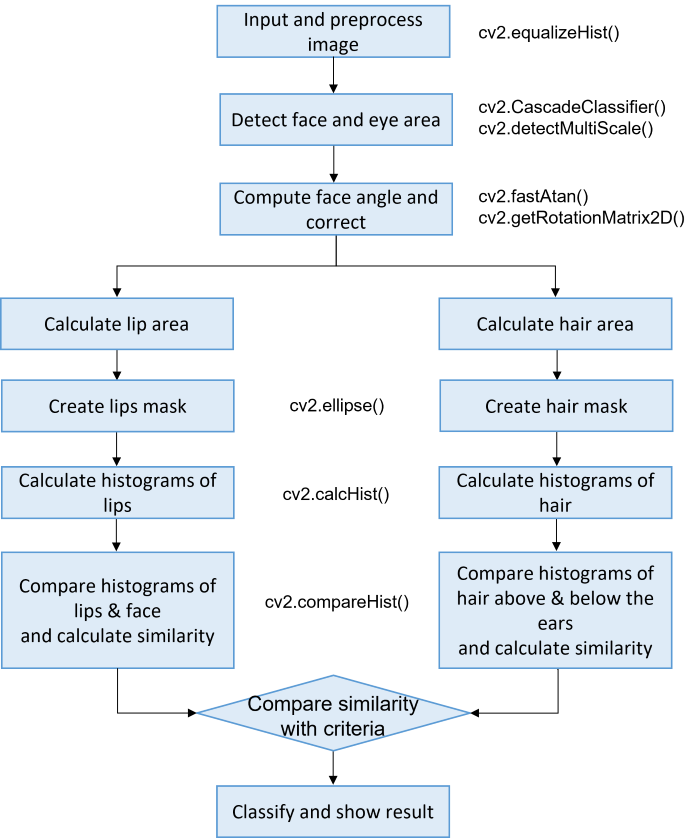

In [1]:
from IPython.display import Image
Image('flowchart.png')

In [2]:
import numpy as np
import cv2

## 2. Haar Cascades

In [3]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

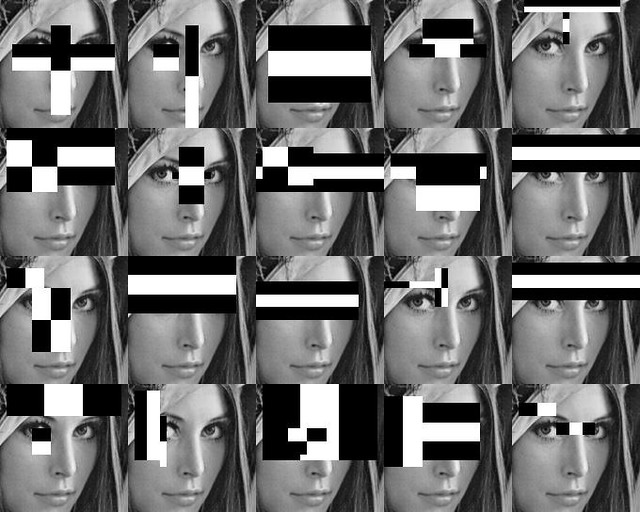

In [4]:
Image('haar_cascade.jpg')

- Haar Cascade is an Object Detection Algorithm used to identify faces in an image or a real time video. 
- The algorithm uses edge or line detection features proposed by Viola and Jones in their research paper “Rapid Object Detection using a Boosted Cascade of Simple Features” published in 2001.

## 3. Process

In [5]:
from haar_histogram import *
from haar_utils import *
from haar_classify import *

## 4. Result

In [6]:
no, max_no, cnt = 0, 75, 1

while True:
    no = no + cnt
    image, gray = preprocessing(no)
    if image is None:
        print('%02d.jpg: No Image' % no)
        if no < 0: no = max_no-1
        elif no >= max_no: no = 0
        continue
        
    faces = face_cascade.detectMultiScale(gray, 1.1, 2, 0, (100, 100))
    if faces.any():
        x, y, w, h = faces[0]
        face_image = image[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(face_image, 1.15, 7, 0, (25, 20))
        if len(eyes) == 2:
            face_center = (x+w/2, y+h/2)
            eye_centers = [(x+ex+ew//2, y+ey+eh//2) for ex, ey, ew, eh, in eyes]
            corr_image, corr_centers = correct_image(image, face_center, eye_centers)
            
            rois = detect_object(face_center, faces[0])
            masks = make_masks(rois, corr_image.shape[:2])
            sims = calc_histo(corr_image, rois, masks)
            
            classify(corr_image, sims, no)
            display(corr_image, face_center, corr_centers, rois)
            
        else:
            print('%02d.jpg: Eyes Not Detected' % no)
            
    else:
        print('%02d.jpg: Face Not Detected' % no)
        
    key = cv2.waitKeyEx(0)
    if key == 2555904: cnt = 1             #Right key
    elif key == 2424832: cnt = -1          #Left key
    elif key == 32 or key == 27: break    #Spacebar or Esc key
        
cv2.waitKey()
cv2.destroyAllWindows()

Male-Similarity[lips-face: 0.10 hair above-below ears: 0.08]
Male-Similarity[lips-face: -0.00 hair above-below ears: 0.01]
Male-Similarity[lips-face: 0.21 hair above-below ears: -0.01]
Female-Similarity[lips-face: 0.06 hair above-below ears: 0.28]
Male-Similarity[lips-face: 0.12 hair above-below ears: 0.05]
06.jpg: Eyes Not Detected
Male-Similarity[lips-face: 0.06 hair above-below ears: -0.02]


## 5. Lessons Learned

- 34: Allyson Felix
- 08: Cathy Park Hong
- 57: Vitalik Buterin
- 68: Abdul Ghani Baradar

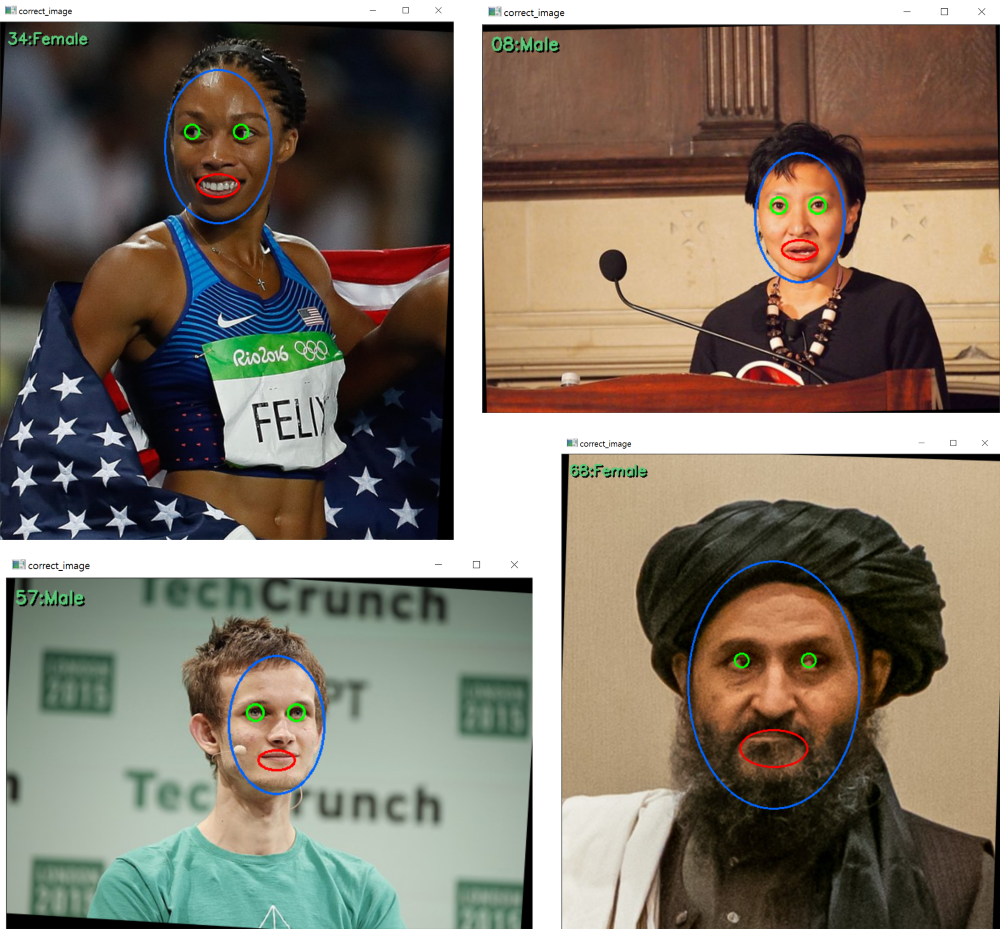

In [7]:
Image('results.png')

### 1) It is difficult to find criteria to tell the gender based on the appearance.
-  When only images of actresses and male athletes were entered, the classification accuracy was close to 100%. 
-  When I changed the image dataset to 'TIME 100 Most Influential People of 2021', the accuracy was significantly lowered, as shown above. (I apologize for the rudeness of the program)

### 2) AI can learn preconceived notions.
-  Classifying gender by lip color or hair length is biased.
-  Gender binary is also biased.
-  I need to be more careful in setting classification criteria and pay more attention to the possibility of bias.

### 3) Various datasets should be used when verifying the accuracy of a program.
-  I would not have been able to learn such valuable lessons if I had only input images that met the criteria I had set.